In [50]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

fig_w,fig_h = 20,10
plt.rcParams['figure.figsize'] = [fig_w,fig_h]

In [51]:
images_path = "data/train_images"
data = pd.read_csv('data/train.csv')
data = data[data['EncodedPixels'].isnull()==False]
data.keys()

Index(['Image_Label', 'EncodedPixels'], dtype='object')

In [52]:
def rle_to_mask(rle_string, width, height):
    '''
    convert RLE(run length encoding) string to numpy array

    Parameters: 
    rle_string (str): string of rle encoded mask
    height (int): height of the mask
    width (int): width of the mask

    Returns: 
    numpy.array: numpy array of the mask
    '''
    
    rows, cols = height, width
    
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img

In [56]:
## Saving the images at size 350X525
output = os.path.join('data','mini_data')
os.makedirs(os.path.join(output,'masks'),exist_ok=True)

for t in ["Fish","Flower","Sugar","Gravel"]:
    lbl_folder = os.path.join(output,t)
    os.makedirs(lbl_folder,exist_ok=True)
    
for row in data.iterrows():
    img_name, img_type = row[1][0].split('_')
    img_path = os.path.join(images_path,img_name)

    img = cv2.imread(img_path)
    h,w,_ = img.shape
    pix = rle_to_mask(row[1][1],w,h)

    img = cv2.resize(img,(0,0),fx=0.25,fy=0.25)
    pix = cv2.resize(pix,(0,0),fx=0.25,fy=0.25)    
    
    cv2.imwrite(os.path.join(lbl_folder,img_name),img)
    cv2.imwrite(os.path.join(lbl_folder,'masks',img_name),pix)

9196/23672
Fish


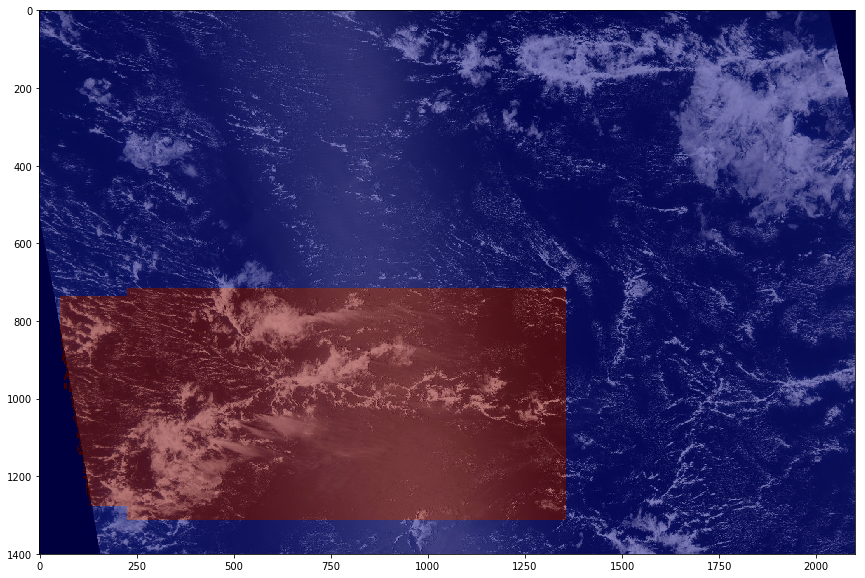

In [44]:
c = np.random.randint(data.size-1)
print("%d/%d"%(c,data.size))
r = data.iloc[c]
   

img_type = r[0].split('_')[1]
img_path = os.path.join(images_path,r[0].split('_')[0])

img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
h,w,_ = img.shape
pix = rle_to_mask(r[1],w,h)

print(img_type)
plt.imshow(img)
plt.imshow(pix, cmap='jet',interpolation='none', alpha=0.5)
plt.show()